# TEMAT №10 Szeregi czasowe (ang. time series)

 
 ### Czym są szeregi czasowe? 
 Szereg czasowy jest zbiorem obserwacji dokonywanych w równych odstępach czasu. 
 Służy do przewidywania przyszlych wartości w oparciu o poprzednie obserwacje, do których zalicza się;
 - prognozowania biznesowe (kursy walut, giełda...)
 - zrozumienia przeszlych zachowań i zaobserwowania przyszlych;
 - oszacowanie bieżących osiągnięć.
 
 Do analizy i prognozowania szeregów czasowych w Python stosowano bibliotekę  statsmodels.tsa.api, która zawiera modele i metody szeregów czasowych. Importowane kanonicznie przy użyciu importu statsmodels.tsa.api jako tsa.
API skupia się na modelach i najczęściej używanych testach statystycznych oraz narzędziach. Ścieżki importu i struktura wyjaśnia projekt dwóch modułów API i jak importowanie z API różni się od bezpośredniego importowania z modułu, w którym zdefiniowany jest model. Więcej informacji znajdziesz w dokumentacji https://www.statsmodels.org/stable/api.html. 
##### Podstawowe komponenty szeregów czasowych:
- trend
- sezonowość
- cykliczność
#### Co to jest Stacjonarność?
Szereg czasowy jest stacjonarny gdy z biegiem czasu zachowuje sie w sposów szczególny, istnieje bardzo duże prawdopodobieństwo, że w przyszlości będę postepować tak samo.
#### Sprawdzić szereg na stacjonarność można za pomocą:
- Rozszerzonego testu Dickeya-Fullera (ADF)
- Przekształcenia logarytmicznego (Box-Cox)
- Dekompozycji trendu sezonowego
- Usuwania trendów poprzez różnicowanie
- Naprawiania niestałej wariancji + usuwanie trendu.
#### Co wskazuje że szereg jest stacjonarnym:
- stała średnia;
- stala wariancja;
- autokowariancja jest niezależna od czasu.



## Czym jest autoregresja? 
Podstawowa koncepcja polega na tym, że prognozujemy interesujące szeregi czasowe y  zakładając, że mają one liniową zależność z innymi szeregami czasowymi x.
Autoregresja – to jest regresja statystyczna w której zmienna objaśniana jest przyszłą wartością ciągu, a zmienna objaśniająca to wartości ciągu czasowego z przeszłości. 
Zmienna prognozowana y jest nazywana także zależną lub objaśnianą. Zmienne predyktorów x są nazywane zmiennymi niezależnymi lub objaśniającymi.
Na przykład możemy prognozować miesięczną sprzedaż y, korzystając z całkowitych wydatków na reklamę x jako predyktora. Albo możemy prognozować dzienne zapotrzebowanie na energię elektryczną y używając temperatury x1 i dnia tygodnia x2 jako predyktorów.

###  Najczęściej stosowane modele statystyczne do prognozowania szeregów czasowych

#### - Wygładzanie wykładnicze 
Metoda obróbki szeregu czasowego zmniejszająca jego wariancję za pomocą ważonej średniej ruchomej z przeszłych wartości, o wagach malejących wykładniczo wraz z odległością w czasie. Stosowana do prostego usuwania szumu lub wizualizacji różnych danych. Jest również przydatna w prognozowaniu szeregów czasowych o niewielkim stosunku sygnału do szumu, szczególnie niemających wyraźnego trendu i wahań sezonowych.


#### - AR (model autoregresyjny)
Modele, w których bieżące wartości szeregu wyrażają się jako liniowe funkcje poprzednich obserwacji, nazywają się modelami autoregresji. Jeżeli bieżąca wartość ciągu xn zależy liniowo tylko od jednej poprzedniej wartości x_(n-1), to taki model jest modelem autoregresji pierwszego rzędu, co oznaczamy jako AR(1). Jeżeli bieżąca wartość ciągu xn zależy liniowo od p poprzednich wartości xn-1,…,xn-p, to taki model jest modelem autoregresji rzędu p, AR(p). 


#### - MA (model średniej ruchomej)
Proces ze średnią ruchomą, jest regresją liniową bieżącej wartości szeregów w odniesieniu do poprzednich wartości błędu, związanych z białym szumem lub przypadkowymi zaburzeniami. Zakłada się, że takie przypadkowe zaburzenia w każdym z punktów pochodzą z tego samego rozkładu, zwykle rozkładu normalnego z zerową wartością oczekiwaną i stałą wariancją. 


#### - ARMA (model autoregresji ze średnią ruchomą)-  obejmuje dwa proste modele ciągów czasowych AR oraz MA. 
Użyteczność modeli ARMA polega na ich oszczędnej reprezentacji. Podobnie jak w przypadku AR i MA, właściwości modeli ARMA można zwykle scharakteryzować za pomocą ich funkcji autokorelacji. Modele ARMA są używane do opisu stacjonarnych ciągów czasowych. Także niektóre rodzaje niestacjonarności można sprowadzać do procesów stacjonarnych przez tworzenie procesów różnic i dalej stosować np.  modele ARMA.


#### - ARIMA (zintegrowany model autoregresji ze średnią ruchomą)
jest złożony z następujących elementów: autoregresja (AR), całkowanie (I) oraz średnia ruchoma (MA). ARIMA jest formą analizy regresji, która mierzy siłę jednej zmiennej zależnej w stosunku do innych zmiennych. Model ten jest szeroko stosowany do prognozowania przyszłych wartości danych, badając różnice między wartościami w ciągach zamiast wartości oryginalnych. Modele zintegrowane służą do opisów procesów stochastycznych niestacjonarnych.
ARIMA z parametrami p, d i q, gdzie:
p - liczba opóźnień obserwacji w modelu.
d - stopień różnicy.
q - zakres średniej ruchomej.


## Dobór modelu

#### 1. Test ADF (rozszerzony test Dickeya-Fullera)
Dla sprawdzenia stacjonarności ciągu robimy analizę za pomocą rozszerzonego testu Dickeya Fullera (ADF). Przy analizie testu ADF warto zwrócić uwagę, że hipoteza zerowa wskazuje na istnienia niestacjonarności. Jeżeli obliczona wartość p jest mniejsza od zadanej alfa, to ta hipoteza zerowa zostaje odrzucona, a ciąg  jest stacjonarny. W przeciwnym razie dane są niestacjonarne.

#### 2. ACF i PACF 

Autokorelacja i autokorelacja cząstkowa to miary związków między bieżącymi i przeszłymi wartościami szeregów określające, które przeszłe wartości szeregów są najbardziej użyteczne przy przewidywaniu przyszłych wartości. Dzięki tej wiedzy można określić kolejność procesów w modelu ARIMA. Dokładniej rzecz ujmując:

##### Funkcja autokorelacji (ACF).
Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie.
Występuje wtedy, gdy skutki działania zmienności losowej nie wygasają w danym okresie t, lecz są przenoszone na okresy przyszłe. 
plot_acf()
http://drizzt.home.amu.edu.pl/images/DADA/W7.pdf

##### Funkcja autokorelacji cząstkowej (PACF). 
jak sama nazwa wskazuje, PACF jest podzbiorem funkcji autokorelacji (ACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie, z jednoczesną rejestracją wartości z przedziałów znajdujących się pomiędzy.
ACF i PACF stosowane są do wyboru rzędu modeli.  PACF pokazuje zależność między xn a poprzednimi wartościami, pomijając wpływ pośrednich opóźnień.
plot_pacf()

Oś x wykresu ACF wskazuje przesunięcie, dla jakiego obliczana jest autokorelacja; oś y wskazuje wartość korelacji (między −1 a 1). Na przykład linia rzutowania przy przesunięciu wynoszącym 1 na wykresie ACF oznacza silną korelację między każdą wartością szeregu a wartością poprzedzającą, zaś linia rzutowania przy przesunięciu wynoszącym 2 oznacza silną korelację między każdą wartością a wartością występującą dwa punkty wcześniej itd.
Korelacja dodatnia oznacza, że duże wartości bieżące odpowiadają dużym wartościom dla danego przesunięcia; ujemna korelacja oznacza, że duże wartości bieżące odpowiadają niewielkim wartościom dla danego przesunięcia.
Wartość bezwzględna korelacji stanowi miarę siły powiązania, przy czym większe wartości bezwzględne oznaczają silniejsze relacje.

#### 3. AIC (kryterium informacyjne Akaikego)
jest estymatorem błędu predykcji w próbie, a tym samym względnej jakości modeli statystycznych dla danego zbioru danych. Jest to jeden ze wskaźników dopasowania modelu, który stosuje się do wyznaczenia miary jakości modeli statystycznych dla badanego zbioru danych. To jak błąd średniokwadratowy w autoregresji — im mniejsza liczba, tym lepiej jest dopasowany model. Na ogół model o większej liczbie predyktorów (parametrów) daje dokładniejsze przewidywania, ponadto ma większą skłonność do przeuczenia. Kryteria informacyjne są nazywane metodami porównywania modeli dla zmiennej zależnej, i stosowane są do wyboru najlepszego modelu.



## Biblioteki

- pip install numpy scipy scikit-learn  #--- to the anaconda terminal
- pip install --user pmdarima   #---installing auto-arima
- pip install -U statsmodels   #---instaling  statsmodels
- import pandas as pd
- from pandas import DataFrame
- import datetime 
- from matplotlib import pyplot
- import matplotlib.pyplot as plt
- from statsmodels.tsa.stattools import adfuller
- from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
- from statsmodels.tsa.arima.model import ARIMA
- import pmdarima as pm
- from pmdarima import model_selection
- import numpy as np
- %matplotlib inline


# Zadanie do ćwiczenia   
### Na podstawie danych zawartych w pliku analiza.csv wykonaj następne punkty:
#### 1) Zaimportój niezbędne biblioteki do szeregów czasowych (https://www.statsmodels.org/stable/api.html), a także biblioteki do operacji na danych oraz tworzenia wykresów.
#### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.
#### 3) Wykonaj wstępny wykres uzyskanych danych (typu "scatter") https://miroslawmamczur.pl/006-wykres-rozrzutu-scatter-plot/
#### 4) Oblicz ADF (p-value, 'ADF Statistic)
#### 5) Wykonaj wykres ACF
#### 6) Wykonaj wykres PACF
#### 7) Podzieł szereg na dane na treningowe i testowe oraz oblicz kryterium  AIC dla modelu ARIMA (3,0.1) (results.summary())
#### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.
#### 9) Zrób wykreś do prognozy
#### 10) Wnioski

# Rozwiązanie 

###  1) Zaimportój niezbędne biblioteki do szeregów czasowych a także biblioteki do operacji na danych oraz tworzenia wykresów


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

%matplotlib inline

### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.


In [2]:
df = pd.read_csv("analiza.csv", decimal=",")
print(f"Wymiar danych: {df.shape}")
df.head()

Wymiar danych: (144, 2)


,Data,Rezerwacja
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
date = df["Data"]
del df["Data"]
df.index = pd.to_datetime(date)
print(f"Wymiar danych: {df.shape}")
df.head()

Wymiar danych: (144, 1)


,Rezerwacja
Data,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 3) Wykonaj wstępny wykres uzyskanych danych 


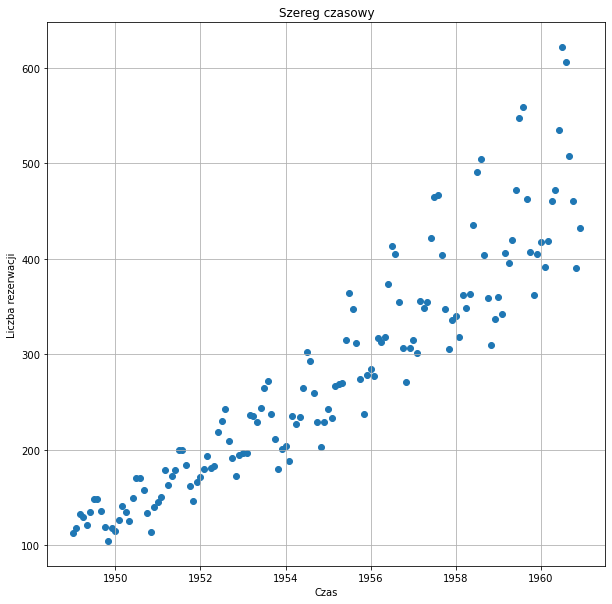

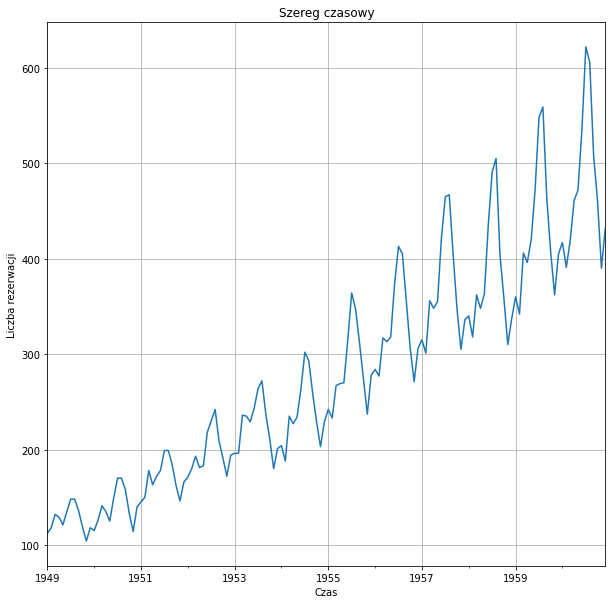

In [4]:
x = df.index
y = df["Rezerwacja"]
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.grid()
plt.xlabel("Czas")
plt.ylabel("Liczba rezerwacji")
plt.title("Szereg czasowy")
plt.show()

df.plot(legend=None, figsize=(10, 10))
plt.grid()
plt.xlabel("Czas")
plt.ylabel("Liczba rezerwacji")
plt.title("Szereg czasowy")
plt.show()

Szereg jest niestacjonarny. Należy ustawic parametr $d$ odpowiadający za część całkującą I w modelu ARIMA na wartość różną od zera.

### 4) Oblicz ADF

In [5]:
result = adfuller(df.values)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411


Wartość ADF Statistic pozwala określić szansę na stacjonarność szeregu czasowego. Wartość $p$ pozwala określić charakter stacjonarności szeregu czasowego na podstawie przyjętego parametru $\alpha$.

Z racji tego, że $p>0.05$, to nie jest obalona zerowa hipoteza niestacjonarności, zatem szereg jest niestacjonarny, co potwierdza nasze spostrzeżenia wynikające z obserwacji wykresu.

### 5) Wykonaj wykres ACF


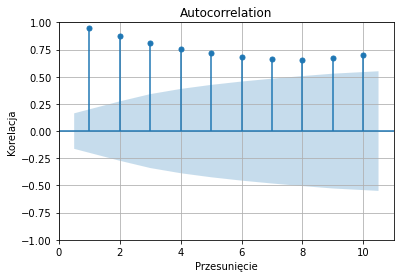

In [6]:
plot_acf(df, zero=False, lags=10)
plt.grid()
plt.xlabel("Przesunięcie")
plt.ylabel("Korelacja")
plt.show()

Korelacja utrzymuje się na stałym poziomie przy zmianie przesunięcia.

### 6) Wykonaj wykres PACF


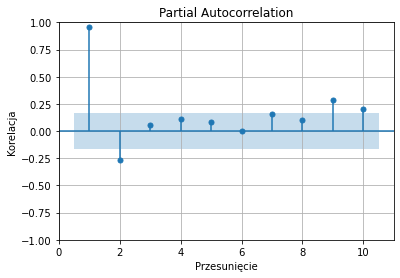

In [7]:
plot_pacf(df, zero=False, lags=10)
plt.grid()
plt.xlabel("Przesunięcie")
plt.ylabel("Korelacja")
plt.show()

Korelacja maleje co do modułu przy wzroście przesunięcia.

Powyższe wykresy potwierdzają niestacjonarność szeregu czasowego.

### 7) Podzieł szereg na dane treningowe i testowe wędlug uznania oraz oblicz kryterium  AIC dla modelu ARIMA (3,0,1) (results.summary())

In [8]:
train = df.iloc[:106, :]
test = df.iloc[106:, :]
model = ARIMA(train, order=(3, 0, 1))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Rezerwacja   No. Observations:                  106
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -483.726
Date:                Fri, 17 Dec 2021   AIC                            979.452
Time:                        04:01:33   BIC                            995.432
Sample:                    01-01-1949   HQIC                           985.929
                         - 10-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.2032     41.783      5.486      0.000     147.311     311.096
ar.L1          0.4709      0.122      3.866      0.000       0.232       0.710
ar.L2          0.5572      0.150      3.710      0.000       0.263       0.852
ar.L3         -0.1220      0.102     -1.190      0.234      -0.323       0.079
ma.L1          0.9317      0.060     15.546      0.000       0.814       1.049
sigma2       521.0119     89.706      5.808      0.000     345.191     696.833
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.00
Prob(Q):                              1.00   Prob(JB):                         0.14
Heteroskedasticity (H):               3.88   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Wartość kryterium AIC wynosi $979.452$.

### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.

In [9]:
pm.auto_arima(train, exogenous=None, seasonal=True, m=12, d=1, D=1, max_p=4, max_q=3, trace=True, error_action="ignore",
              suppress_warning=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=693.048, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=694.203, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=690.179, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=690.593, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=690.040, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=690.477, Time=0.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=691.996, Time=0.17 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=691.917, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=691.455, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=690.190, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=693.402, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=691.769, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.262 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  106
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -343.020
Date:                            Fri, 17 Dec 2021   AIC                            690.040
Time:                                    04:01:34   BIC                            695.105
Sample:                                         0   HQIC                           692.085
                                            - 106                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2530      0.092     -2.751      0.006      -0.433      -0.073
sigma2        93.5204     13.683      6.835      0.000      66.702     120.339
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.97   Prob(JB):                         0.38
Heteroskedasticity (H):               0.99   Skew:                             0.35
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Najlepszy model to ARIMA$(1, 1, 0)(0, 1, 0)[12]$, dla którego wartość kryterium AIC to $690.040$ - znacznie mniejsza niż dla ARIMA z własnoręcznie dobranymi parametrami. Potwierdza to nasze przypuszczenia, że wartość $d$ powinna być różna od zera. Wykorzystajmy wyznaczone optymalne parametry w dalszej części ćwiczenia. Dane są podawane w odstępach miesięcznych, zatem należało ustawić wartość $m$ jako $12$.

### 9) Wykonaj wykres prognozy

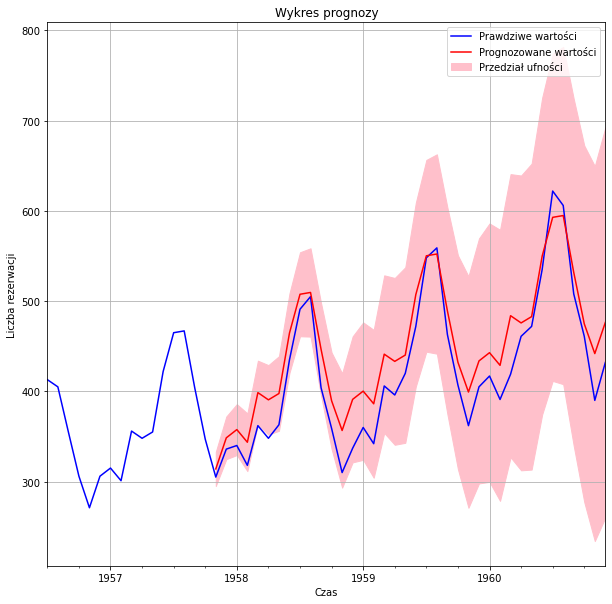

In [10]:
model = ARIMA(train, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))
forecast = model.fit().get_forecast(steps=38)
confidence_area = forecast.conf_int()

df.iloc[90:, :].plot(c="blue", figsize=(10, 10))
forecast.predicted_mean.plot(c="red")
plt.fill_between(confidence_area.index, confidence_area["lower Rezerwacja"], confidence_area["upper Rezerwacja"], color="pink")
plt.grid()
plt.legend(["Prawdziwe wartości", "Prognozowane wartości", "Przedział ufności"])
plt.xlabel("Czas")
plt.ylabel("Liczba rezerwacji")
plt.title("Wykres prognozy")
plt.show()

Przewidywane dane w miarę dobrze odwzorowują rzeczywiste dane, zatem możemy użyć naszego modelu do przewidywania przyszłości.

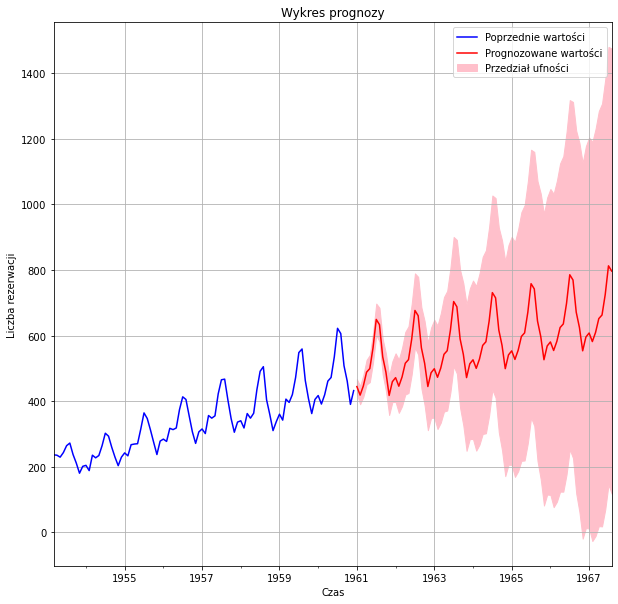

In [11]:
model = ARIMA(df, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))
forecast = model.fit().get_forecast(steps=80)
confidence_area = forecast.conf_int()

df.iloc[50:, :].plot(c="blue", figsize=(10, 10))
forecast.predicted_mean.plot(c="red")
plt.fill_between(confidence_area.index, confidence_area["lower Rezerwacja"], confidence_area["upper Rezerwacja"], color="pink")
plt.grid()
plt.legend(["Poprzednie wartości", "Prognozowane wartości", "Przedział ufności"])
plt.xlabel("Czas")
plt.ylabel("Liczba rezerwacji")
plt.title("Wykres prognozy")
plt.show()

### 10) Wnioski

ARIMA to model statystyczny, który pozwala na przewidywanie przyszłych danych na podstawie danych z przeszłości, czyli zbioru uczącego. Wykorzystuje się go dla stacjonarnych szeregów czasowych. Funkcja auto_arima() z pakietu pmdarima pozwala na dobór najlepszego modelu dopasowania do naszych danych.

Porównując dane prognozowane do tych rzeczywistych, można stwierdzić, że przewidywanie jest poprawne. Naturalnie korzystamy z pewnego rodzaju przybliżenia, gdyż niestety nie da się przewidzieć wyników w sposób dokładny.

Model ARIMA w sposób zadowalający przeprognozował kolejne wartości. Należy pamiętać, że im bardziej nasze prognozy wykraczają w przyszłość, tym bardziej są one niepewne - wystarczy zwrócić uwagę na rozmiar przedziału ufności.